### Реквесты, респонсы, апи и тд
HTTP-request - запрос от *клиента* к *серверу*

В основном выделяют 3 части HTTP реквеста: 
- строка запроса
- множество заголовков
- тело (необязательно)

#### Строка запроса / Request line
Строка запроса есть первая строка в самом реквесте. Состоит из как минимум 3 частей: 
- Метод. Метод это одно слово, которое говорит серверу, что он должен сделать с ресурсом. Например, **GET** требует у сервера предоставить ресурс.
- Путь (без домена). Пара Метод + Путь есть эндпоинт (конечная точка)
- Версия HTTP
- Опционально, в теле запроса могут быть query params, параметры запроса. Они записываются в пути запроса, после знака '?' в формате ключ=значение через знак '&'. Например: '/software?id=4&date=now'
>Пример строки запроса:<br><br>
>GET /software/htp/cics/index.html HTTP/1.1

#### HTTP заголовки (хедеры)
HTTP заголовки записаны в сообщение для того, чтобы передать серверу информацию о самом сообщение, об отправителе, данные для аутентификации и тд. 
>Пример заголовков:<br>
><br>
>Accept-Language: fr, de<br>
>If-Modified-Since: Fri, 10 Dec 2004 11:22:13 GMT<br>

#### Тело запроса
В теле запроса может находится любая информация. Тело запроса может быть сырым (**raw**), либо иметь формат JSON, а также множество других форматов. 
>Пример тела в формате JSON:<br><br>
>{"user": {"name": "Artem", "age": 21}}

### Методы запросов
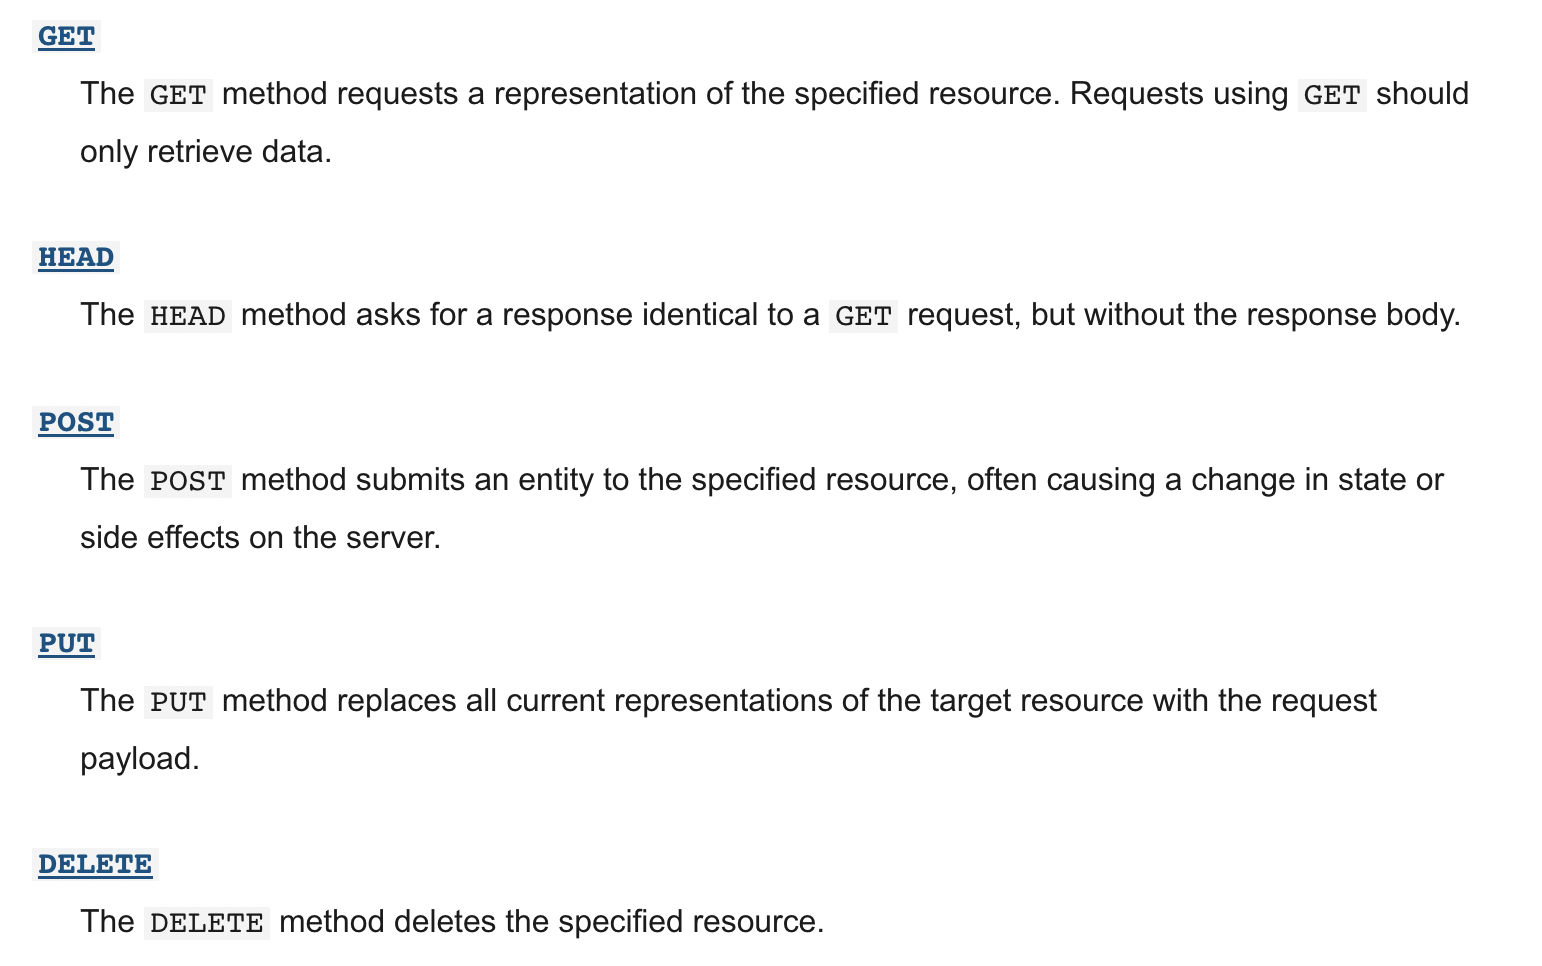


### Респонс (ответ)
Ответ сервера на запрос состоит из тех же частей, за исключением новой - status code.  
Статус код, это число (в основном из 3 или 4 цифр), которое обозначает статус реквеста.  
Примеры статус кодов:  
- 200 OK
- 400 Bad Request
- 401 Unauthorized
- 404 Not Found
- 405 Method Not Allowed
- 500 Internal Server Error
- 502 Bad Gateway

### JavaScript Object Notation
JSON - это строка, которая репрезентует словарь, часто используется в веб разработке.

In [7]:
import json

# переведём словарь в json через метод dumps
myDict = [1, 2, 3]
str_ = json.dumps(myDict)
str_, type(str_)

('[1, 2, 3]', str)

In [8]:
# и вернём обратно
dict_ = json.loads(str_)
dict_, type(dict_)

([1, 2, 3], list)

### Пайтон библиотека Requests
Установка: <br>
`pip install requests`

In [9]:
# отослать реквест
import requests as r

baseurl = "https://api.ipify.org"
res = r.get(baseurl)

In [10]:
# статус код респонса
res.status_code

200

In [11]:
# Тело ответа, content возвращает в байтах
res.text, res.content

('158.255.129.72', b'158.255.129.72')

In [12]:
# True, если status_code < 400
res.ok

True

In [17]:
# Заголовки ответа
res

<Response [200]>

In [18]:
# ЮРЛ запроса
res.url

'https://api.ipify.org/'

In [19]:
res.reason

'OK'

In [20]:
# А теперь отошлём *плохой* реквест

baseurl = "https://api.ipify.org"
res = r.get(baseurl + "/bad_data")
res.status_code, res.reason

(404, 'Not Found')

In [23]:
# Передавать параметры можно просто в самом URL
baseurl = "https://api.ipify.org"
res = r.get(baseurl + "?format=json")
res.json()  # метод json - автоматически переведёт ответ в словарь

{'ip': '158.255.129.72'}

In [24]:
# Либо через аргумент params в формате словаря
res = r.get(baseurl, params={"format": "json"})
res.json()

{'ip': '158.255.129.72'}

### Апи телеграма
https://core.telegram.org/bots/api

In [25]:
from urllib.parse import urljoin

token = "2122410564:AAEx-qRZVnnExQARNklz9OpOOHACdTERFwI"
baseurl = "https://api.telegram.org/bot{}/".format(token)

In [26]:
r.get(urljoin(baseurl, "getMe")).json()

{'ok': True,
 'result': {'id': 2122410564,
  'is_bot': True,
  'first_name': 'Python Courses Test Bot',
  'username': 'python_courses_test_bot',
  'can_join_groups': True,
  'can_read_all_group_messages': False,
  'supports_inline_queries': False}}

In [31]:
r.get(urljoin(baseurl, "getUpdates")).json()

{'ok': True,
 'result': [{'update_id': 903279090,
   'message': {'message_id': 79,
    'from': {'id': 418878871,
     'is_bot': False,
     'first_name': 'Петер',
     'last_name': 'Ибрагимов',
     'username': 'TeaDove',
     'language_code': 'en'},
    'chat': {'id': 418878871,
     'first_name': 'Петер',
     'last_name': 'Ибрагимов',
     'username': 'TeaDove',
     'type': 'private'},
    'date': 1636390469,
    'text': '/start',
    'entities': [{'offset': 0, 'length': 6, 'type': 'bot_command'}]}},
  {'update_id': 903279091,
   'message': {'message_id': 80,
    'from': {'id': 418878871,
     'is_bot': False,
     'first_name': 'Петер',
     'last_name': 'Ибрагимов',
     'username': 'TeaDove',
     'language_code': 'en'},
    'chat': {'id': 418878871,
     'first_name': 'Петер',
     'last_name': 'Ибрагимов',
     'username': 'TeaDove',
     'type': 'private'},
    'date': 1636390617,
    'text': 'asd'}},
  {'update_id': 903279092,
   'message': {'message_id': 81,
    'from': {'i

In [42]:
import time
from datetime import datetime


def get_offset():
    updates = r.post(urljoin(baseurl, "getUpdates"), json={"limit": 1}).json()["result"]
    while not updates:
        time.sleep(0.5)
        updates = r.post(urljoin(baseurl, "getUpdates"), json={"limit": 1}).json()["result"]
    return updates[0]["update_id"]


get_offset()

903279108

In [53]:
try:
    offset = get_offset()
    while True:
        updates = r.post(
            urljoin(baseurl, "getUpdates"), json={"offset": offset, "allowed_updates": ["message"]}
        ).json()["result"]
        for update in updates:
            if "text" in update["message"]:
                text = update["message"]["text"] + ": " + str(datetime.fromtimestamp(update["message"]["date"]))
                r.post(urljoin(baseurl, "sendMessage"), json={"chat_id": update["message"]["chat"]["id"], "text": text})

        if updates:
            offset = updates[-1]["update_id"] + 1
        else:
            time.sleep(0.5)
except KeyboardInterrupt:
    print("Bye!")

Bye!
